In [1]:
import pandas as pd
dataset = pd.read_csv("Churn_Modelling.csv")

In [2]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
y = dataset['Exited']


In [5]:
X = dataset.iloc[:,3:]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
geo = dataset["Geography"]

In [8]:
geo = pd.get_dummies(geo,drop_first=True)

In [9]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
gender = dataset['Gender']

In [11]:
gender = pd.get_dummies(gender,drop_first=True)

In [12]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [13]:
X_final = pd.concat([X,gender,geo],axis=1)

In [14]:
X_final = X_final.drop(['Geography',"Gender"],axis=1)

In [15]:
X_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.20)

In [18]:
X_train.shape

(8000, 12)

In [19]:
X_test.shape

(2000, 12)

In [20]:
from keras.models import Sequential

In [21]:
model = Sequential()

In [22]:
from keras.layers import Dense

In [23]:
model.add(Dense(units=8,activation="relu",bias_initializer="zeros",kernel_initializer="zeros",input_dim=12))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(units=8,activation="relu",bias_initializer="zeros",kernel_initializer="zeros"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(Dense(units=8,activation="relu",bias_initializer="zeros",kernel_initializer="zeros"))

In [28]:
model.add(Dense(units=1,activation="sigmoid",bias_initializer="zeros",kernel_initializer="zeros"))

In [29]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    '

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy"])

In [32]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.,

In [33]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5416 - accuracy: 0.7991
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7991
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7991
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7991
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7991
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7991
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7991
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7991
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7991
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7991
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7991
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 

In [34]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.,

In [35]:
l = pd.DataFrame(model.history.history)

<AxesSubplot:>

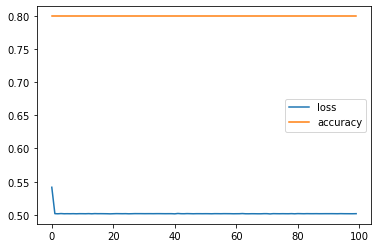

In [36]:
l.plot()

In [37]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
